## Imports

In [1]:
%matplotlib inline

import os
import certifi
import arcpy

# set default gdal and ertifi envs (non-dev)
try:
    install_dir = arcpy.GetInstallInfo().get('InstallDir')  # get arcgis install dir
    os.environ['GDAL_DATA'] = os.path.join(install_dir, 'Resources\pedata\gdaldata')  # join to gdal install
    os.environ.setdefault("CURL_CA_BUNDLE", certifi.where())  # set certifi
except:
    arcpy.AddError('Could not get install directory for ArcGIS Pro or set certifi.')
    raise
    
# globals (dev)
FOLDER_MODULES = r'C:\Users\Lewis\Documents\GitHub\tenement-tools\modules'  
FOLDER_SHARED = r'C:\Users\Lewis\Documents\GitHub\tenement-tools\shared'
GRP_LYR_FILE = r"C:\Users\Lewis\Documents\GitHub\tenement-tools\arc\lyr\group_template.lyrx"

# set gdal global environ
import os
os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'
os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS '] = 'tif'
os.environ['VSI_CACHE '] = 'TRUE'
os.environ['GDAL_HTTP_MULTIRANGE '] = 'YES'
os.environ['GDAL_HTTP_MERGE_CONSECUTIVE_RANGES '] = 'YES'

# also set rasterio env variables
rasterio_env = {
    'GDAL_DISABLE_READDIR_ON_OPEN': 'EMPTY_DIR',
    'CPL_VSIL_CURL_ALLOWED_EXTENSIONS': 'tif',
    'VSI_CACHE': True,
    'GDAL_HTTP_MULTIRANGE': 'YES',
    'GDAL_HTTP_MERGE_CONSECUTIVE_RANGES': 'YES'
}

# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# safe imports
import sys                  # arcgis comes with these
import datetime                 # arcgis comes with these
import numpy as np              # arcgis comes with these
import arcpy                    # arcgis comes with these
import matplotlib.pyplot as plt
from datetime import datetime   # arcgis comes with these

# risky imports (not native to arcgis)
try:
    from osgeo import gdal
    from osgeo import ogr
    from osgeo import osr
    import tempfile
    import xarray as xr
    import dask
    import rasterio
    import pystac_client
    from odc import stac
except:
    arcpy.AddError('Python libraries xarray, dask, rasterio, pystac, or odc not installed.')
    raise

# import tools
try:
    # shared folder
    sys.path.append(FOLDER_SHARED)
    import arc, satfetcher, tools

    # module folder
    sys.path.append(FOLDER_MODULES)
    import nrt, cog_odc, cog
except:
    arcpy.AddError('Could not find tenement tools python scripts (modules, shared).')
    raise

In [2]:
from importlib import reload
reload(nrt)

<module 'nrt' from 'C:\\Users\\Lewis\\Documents\\GitHub\\tenement-tools\\modules\\nrt.py'>

## Create monitoring project

In [9]:
# user creates monitoring projects. includes gdb and folders for project structure

## Create monitoring areas

In [4]:
# user creates monitoring polygons and fills in info in each row of table

## NRT data Testing

In [ ]:
# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=dask.array.core.PerformanceWarning)

# all provisional + non-provisional landsat
out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
s_year = '{}-01-01'.format(1990)
e_year = '{}-12-31'.format(datetime.now().year)
bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
in_epsg = 3577

# get params
params = nrt.get_satellite_params(platform='Landsat')

# open existing cube
ds_existing = xr.open_dataset(r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc")

# sync cube to now
ds_ls = nrt.sync_nrt_cube(out_nc=out_nc,
                          collections=params.get('collections'),
                          bands=params.get('bands'),
                          start_dt=s_year,
                          end_dt=e_year,
                          bbox=bbox,
                          in_epsg=in_epsg,
                          slc_off=False,
                          resolution=params.get('resolution'),
                          ds_existing=None,
                          chunks={})

In [ ]:
# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=dask.array.core.PerformanceWarning)

# all provisional + non-provisional landsat
out_nc = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc"
s_year = '{}-01-01'.format(1990)
e_year = '{}-12-31'.format(datetime.now().year)
bbox = [119.85685826326254, -23.31510503211872, 119.85838607621004, -23.31250952051907]
in_epsg = 3577

# get params
params = nrt.get_satellite_params(platform='Sentinel')

# open existing cube
ds_existing = xr.open_dataset(r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A01.nc")

# sync cube to now
ds_s2 = nrt.sync_nrt_cube(out_nc=out_nc,
                          collections=params.get('collections'),
                          bands=params.get('bands'),
                          start_dt=s_year,
                          end_dt=e_year,
                          bbox=bbox,
                          in_epsg=in_epsg,
                          slc_off=False,
                          resolution=params.get('resolution'),
                          ds_existing=None,
                          chunks={})

## Monitor simulation

### Load raw vege, smooth, veg, raw change time series

In [3]:
ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A01.nc")  # big impact 2007 ophtha dam area
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A02.nc")  # big impact 2007 ophtha dam area, but training done 2013, so recovery is shown
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A03.nc")  # near impact 2007 ophtha dam area, less impact in 2007
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A04.nc")  # open shrubland with wo euc? training period bad
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A05.nc")  # mulga area on road side? training period bad
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A06.nc")  # euc vic east yandi. gradual increasing... odd result? try train period
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A07.nc")  # yandi discharge south veg... good, but change in training period?
#ds_change = xr.open_dataset(r"C:\Users\Lewis\Desktop\test_change\change_A08.nc")   # yandi elephatn graveyard. good - 2007 decline

vec_summary = ds_change['summary'].median(['x', 'y']).data
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_summary, color='green')
plt.show()

vec_static = ds_change['static'].median(['x', 'y']).data
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static, color='blue')
plt.show()

vec_static_smooth = nrt.smooth_change(arr=vec_static)       
fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static, color='blue')
plt.plot(vec_static_smooth, color='red')
plt.show()

OSError: [Errno -90] NetCDF: file not found: b'C:\\Users\\Lewis\\Desktop\\test_change\\change_A01.nc'

## Apply rule 1: consequtives

In [ ]:
min_consequtives = 3
max_consequtives = 5
inc_plateaus_in_runs = True

# get inc, dec and stable counts
vec_rule_1 = nrt.apply_rule_one(arr=vec_static_smooth, 
                                direction='decline', 
                                min_consequtives=3, 
                                max_consequtives=None,
                                inc_plateaus=False)

fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static_smooth, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rule_1 >= 1, vec_static_smooth, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Apply rule 2: threshold

In [ ]:
vec_rule_2 = nrt.apply_rule_two(vec_static_smooth, direction='decline', min_stdv=1, operator='<=')
#vec_rule_2_incline = apply_rule_two(yest, min_zone=1, operator='>=')

fig = plt.figure(figsize=(15, 4))
plt.plot(vec_static_smooth, color='darkblue', marker='o', alpha=0.25)
plt.plot(vec_rule_2, color='red', marker='o', alpha=0.25)
plt.show()

## Apply rule 3: jumps

In [ ]:
# temp - just testing
spiked = vec_static_smooth.copy()
#spiked[-10: -5] = spiked[-10: -5] - 8
#spiked[25: 30] = spiked[25: 30] - 4

# get num zones to jump
num_stdvs = nrt.get_stdv_from_zone(num_zones=1)

vec_rule_3 = nrt.apply_rule_three(spiked, direction='decline', num_stdv_jumped=num_stdvs, min_consequtives=3)
# #spike_inc = apply_rule_three(spiked, jump_direction='increase', jump_size=1, min_consequtives=3)

fig = plt.figure(figsize=(15, 4))
plt.plot(spiked, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rule_3 >= 1, spiked, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Apply rules 1, 2, 3: combined

In [ ]:
vec_rules_combo = nrt.apply_rule_combo(arr_r1=vec_rule_1, 
                                       arr_r2=vec_rule_2, 
                                       arr_r3=vec_rule_3, 
                                       ruleset='1&2|3')



fig = plt.figure(figsize=(15, 4))
plt.plot(spiked, color='darkblue', marker='o', alpha=0.25)
plt.plot(np.where(vec_rules_combo >= 1, spiked, np.nan), color='red', marker='o', alpha=0.25)
plt.show()

## Assign zone to rule output

In [ ]:
# classify smoothed array into zone 0
vec_temp = np.abs(vec_static_smooth)

# zone 0 - from 0 to 1 (+/-)
zone_0 = np.where((vec_temp >= 0) & (vec_temp <= 1), 0, 0)

# zone 1 - between 1 and 3 (+/-)
zone_1 = np.where((vec_temp > 1) & (vec_temp <= 3), 1, 0)

# zone 2 - between 3 and 5 (+/-)
zone_2 = np.where((vec_temp > 3) & (vec_temp <= 5), 2, 0)

# zone 3 - between 5 and 7 (+/-)
zone_3 = np.where((vec_temp > 5) & (vec_temp <= 7), 3, 0)

# zone 4 - between 7 and 9 (+/-)
zone_4 = np.where((vec_temp > 7) & (vec_temp <= 9), 4, 0)

# zone 5 - between 9 and 11 (+/-)
zone_5 = np.where((vec_temp > 9) & (vec_temp <= 11), 5, 0)

# zone 6 - between 11 and 13 (+/-)
zone_6 = np.where((vec_temp > 11) & (vec_temp <= 13), 6, 0)

# zone 7 - between 13 and 15 (+/-)
zone_7 = np.where((vec_temp > 13) & (vec_temp <= 15), 7, 0)

# zone 8 - between 15 and 17 (+/-)
zone_8 = np.where((vec_temp > 15) & (vec_temp <= 17), 8, 0)

# zone 9 - between 17 and 19 (+/-)
zone_9 = np.where((vec_temp > 17) & (vec_temp <= 19), 9, 0)

# zone 10 - above 19 (+/-)
zone_10 = np.where(vec_temp > 19, 10, 0)

In [ ]:
# simulate input
arr = vec_static_smooth.copy()

# set up zone ranges (stdvs)
zones = [
    [0, 1],    # zone 1 - from 0 to 1 (+/-)
    [1, 3],    # zone 2 - between 1 and 3 (+/-)
    [3, 5],    # zone 3 - between 3 and 5 (+/-)
    [5, 7],    # zone 4 - between 5 and 7 (+/-)
    [7, 9],    # zone 5 - between 7 and 9 (+/-)
    [9, 11],   # zone 6 - between 9 and 11 (+/-)
    [11, 13],  # zone 7 - between 11 and 13 (+/-)
    [13, 15],  # zone 8 - between 13 and 15 (+/-)
    [15, 17],  # zone 9 - between 15 and 17 (+/-)
    [17, 19],  # zone 10 - between 17 and 19 (+/-)
    [19]       # zone 11- above 19 (+/-)
]

# create template vector
vec_temp = np.full_like(arr, fill_value=np.nan)

# iter zones
for i, z in enumerate(zones, start=1):
    
    # 
    if i == 1:
        vec_temp[np.where((arr >= z[0]) & (arr <= z[1]))] = i
        vec_temp[np.where((arr < z[0]) & (arr >= z[1] * -1))] = i * -1
            
    elif i == 11:       
        vec_temp[np.where(arr > z[0])] = i
        vec_temp[np.where(arr < z[0] * -1)] = i * -1
        
    else:
        vec_temp[np.where((arr > z[0]) & (arr <= z[1]))] = i
        vec_temp[np.where((arr < z[0] * -1) & (arr >= z[1] * -1))] = i * -1
        
        

In [ ]:
vec_temp

In [ ]:
# dont forget, you need second last image when alerting and displaying data

In [ ]:
def classify_flag(arr):
    # classify smoothed array into zone 0
    vec_temp = np.abs(vec_static_smooth)

    # zone 0 - from 0 to 1 (+/-)
    zone_0 = np.where((vec_temp >= 0) & (vec_temp <= 1), 0, 0)

    # zone 1 - between 1 and 3 (+/-)
    zone_1 = np.where((vec_temp > 1) & (vec_temp <= 3), 1, 0)

    # zone 2 - between 3 and 5 (+/-)
    zone_2 = np.where((vec_temp > 3) & (vec_temp <= 5), 2, 0)

    # zone 3 - between 5 and 7 (+/-)
    zone_3 = np.where((vec_temp > 5) & (vec_temp <= 7), 3, 0)

    # zone 4 - between 7 and 9 (+/-)
    zone_4 = np.where((vec_temp > 7) & (vec_temp <= 9), 4, 0)

    # zone 5 - between 9 and 11 (+/-)
    zone_5 = np.where((vec_temp > 9) & (vec_temp <= 11), 5, 0)

    # zone 6 - between 11 and 13 (+/-)
    zone_6 = np.where((vec_temp > 11) & (vec_temp <= 13), 6, 0)

    # zone 7 - between 13 and 15 (+/-)
    zone_7 = np.where((vec_temp > 13) & (vec_temp <= 15), 7, 0)

    # zone 8 - between 15 and 17 (+/-)
    zone_8 = np.where((vec_temp > 15) & (vec_temp <= 17), 8, 0)

    # zone 9 - between 17 and 19 (+/-)
    zone_9 = np.where((vec_temp > 17) & (vec_temp <= 19), 9, 0)

    # zone 10 - above 19 (+/-)
    zone_10 = np.where(vec_temp > 19, 10, 0)

In [ ]:
vec_temp_signed = vec_static_smooth.copy()
vec_temp_signed = np.where(np.sign(vec_temp_signed) == 0, 1, np.sign(vec_temp_signed))

## Main function

In [ ]:
# for i in np.arange(0, len(vec_rule_1_decline)):
#     if i > 3:
    
#         vec_smooth = vec_static_smooth[0:i]
#         vec_rule = vec_rule_1_decline[0:i]
        
#         alarm = False
#         if vec_rule[-2] >= 1:
#             alarm = True
            
#         fig = plt.figure(figsize=(15, 4))
#         plt.plot(vec_smooth, color='darkblue', marker='o', alpha=0.25)
        
#         if alarm: 
#             plt.axvline(i - 2, color='black', linestyle='dashed')
        
#         plt.show()
#         plt.close()

## Working

In [3]:
# set gdal global environ
import os
os.environ['GDAL_DISABLE_READDIR_ON_OPEN'] = 'EMPTY_DIR'
os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS '] = 'tif'
os.environ['VSI_CACHE '] = 'TRUE'
os.environ['GDAL_HTTP_MULTIRANGE '] = 'YES'
os.environ['GDAL_HTTP_MERGE_CONSECUTIVE_RANGES '] = 'YES'

# also set rasterio env variables
rasterio_env = {
    'GDAL_DISABLE_READDIR_ON_OPEN': 'EMPTY_DIR',
    'CPL_VSIL_CURL_ALLOWED_EXTENSIONS':'tif',
    'VSI_CACHE': True,
    'GDAL_HTTP_MULTIRANGE': 'YES',
    'GDAL_HTTP_MERGE_CONSECUTIVE_RANGES': 'YES'
}

# disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# safe imports
import sys                      # arcgis comes with these
import shutil                   # arcgis comes with these
import datetime                 # arcgis comes with these
import numpy as np              # arcgis comes with these
import arcpy                    # arcgis comes with these
import tempfile                 # arcgis comes with these
from datetime import datetime   # arcgis comes with these

# risky imports (not native to arcgis)
try:
    import xarray as xr
    import dask
    import rasterio
    import pystac_client
    import osr
    from odc import stac
    from osgeo import gdal
    from osgeo import ogr
    from osgeo import osr
except:
    arcpy.AddError('Python libraries xarray, dask, rasterio, pystac, or odc not installed.')
    raise

# import tools
try:
    # shared folder
    sys.path.append(FOLDER_SHARED)
    import arc, satfetcher, tools

    # module folder
    sys.path.append(FOLDER_MODULES)
    import nrt, cog_odc, cog
except:
    arcpy.AddError('Could not find tenement tools python scripts (modules, shared).')
    raise
    
# grab parameter values 
#in_feat = r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia.gdb\monitoring_areas"
in_feat = r"C:\Users\Lewis\Desktop\nrt_projects\yandi.gdb\monitoring_areas"
in_ongoing = False
in_time_interval = 12
#in_email_from = parameters[3].value                # email from 
#in_smtp_server = parameters[4].value               # email smtp server 
#in_smtp_port = parameters[5].value                 # email smtp port 
#in_smtp_username = parameters[6].value             # email smtp username 
#in_smtp_password = parameters[7].value             # email smtp password 
#in_epsg = parameters[8].value                      # input epsg
#in_fmask_flags = parameters[9].valueAsText         # fmask flag values
#in_max_cloud = parameters[10].value                # max cloud percentage
#in_interpolate = parameters[11].value              # interpolate missing pixels

in_persistence = 0.3  # add this. 1 works good now. lower has mor enoise but quickest detection, higher less noise slower response

In [4]:
# # # # #
# notify user and set up progress bar
#arcpy.AddMessage('Beginning NRT Monitoring of areas.')
#arcpy.SetProgressor(type='step', 
                    #message='Preparing parameters...',
                    #min_range=0, max_range=20)

# convert fmask as text to numeric code equivalents      
#in_fmask_flags = [e for e in in_fmask_flags.split(';')]        
#in_fmask_flags = arc.convert_fmask_codes(in_fmask_flags)

# check if cloud cover is valid
#if in_max_cloud < 0 or in_max_cloud > 100:
    #arcpy.AddError('Cloud cover must be between 0 and 100.')
    #raise

# check if time interval is > 0
in_time_interval = in_time_interval * 60 * 60
if in_time_interval <= 0:
    arcpy.AddError('Time interval must be above 0 hours.')
    raise


# # # # #
# notify and increment progress bar
#arcpy.SetProgressorLabel('Checking parameters...')
#arcpy.SetProgressorPosition(1)

# prepare features shapefile
shp_desc = arcpy.Describe(in_feat)
in_feat = os.path.join(shp_desc.path, shp_desc.name)

# validate monitoring area feature class
if not nrt.validate_monitoring_areas(in_feat):
    arcpy.AddError('Monitoring areas feature is invalid.')
    raise

# get input featureclass file, get dir and filename
in_name = os.path.basename(in_feat)     # name of monitor fc
in_gdb = os.path.dirname(in_feat)       # path of gdb

# check gdv extension
if not in_gdb.endswith('.gdb'):
    arcpy.AddError('Feature class is not in a geodatabase.')
    raise
else:
    in_path = os.path.splitext(in_gdb)[0]   # path of gdb without ext
    in_data_path = in_path + '_' + 'cubes'  # associated cube data folder

# check if cubes folder exists
if not os.path.exists(in_data_path):
    arcpy.AddError('Could not find cube folder for selected monitoring areas.')
    raise

In [7]:
# might want soem checks to ensure > 5 years between start and end (ewmacd fails with too few years)
# try catch around ewmacd stuff
# sortby on 
# may want a data spike remover before change detection incase s2 jumps around

# supress this wanring - it will keep happening every fetch if you dont
#C:\Users\Lewis\AppData\Local\ESRI\conda\envs\arcgispro-py3-dev-odc\Lib\site-packages\odc\stac\_eo3.py:577: UserWarning: Missing asset with name: nbar_nir
  #warn(f"Missing asset with name: {band}")
#C:\Users\Lewis\AppData\Local\ESRI\conda\envs\arcgispro-py3-dev-odc\Lib\site-packages\odc\stac\_eo3.py:577: UserWarning: Missing asset with name: nbar_red

# also supress this warning - happening on area 3
#C:\Users\Lewis\Documents\GitHub\tenement-tools\modules\nrt.py:1404: RuntimeWarning: invalid value encountered in double_scalars
  #Rsquared = 1 - np.sum(np.square(Responses_keeps - fits)) / np.sum(np.square(Responses_keeps - np.sum(Responses_keeps) / len(Responses_keeps)))
    
# check area 3 - when 3 declines from 1 down to 0 (no change), dont warn?

# check area 3 - why are flags occuring in 0 when rule 2 is applied? shouldnt these only happen < -1 ?
# yeo, def bug with area 3 - conseqs dont appear to be working. investoigate.


In [8]:
def test(e_year):
    
    # # # # #
    # notify and increment progress bar
    #arcpy.SetProgressorLabel('Loading monitoring area features...')
    #arcpy.SetProgressorPosition(2)

    # get features (will always have at least one, validated earlier)
    try:
        fields = ['area_id', 'platform', 's_year', 'e_year', 'index', 'SHAPE@']
        feats = arcpy.da.SearchCursor(in_feat, fields)
        
        #feats.next()  # TEMP TESTING        
    except:
        raise ValueError('Could not open monitoring areas feature.')


    # # # # #
    # notify and set progress bar to defaukt
    #arcpy.SetProgressor(type='default', message='Iterating through monitoring areas...')

    # begin monitoring process iteration
    continue_monitoring = True
    while continue_monitoring:
        for feat in feats:

            # # # # #
            # notify 
            #arcpy.AddMessage('Preparing parameters for area: {}...'.format(feat[0]))

            # set expected cube filepath and start/end (current) date
            out_raw_nc = os.path.join(in_data_path, 'cube' + '_' + feat[0] + '.nc')  # is area_id
            s_year = '{}-01-01'.format(feat[2])
            #e_year = '{}-12-31'.format(datetime.now().year)
            #e_year = '2010-05-30' # NOTE TESTING ONLY
            print(s_year, e_year) # temp!!


            # # # # #
            # notify 
            #arcpy.AddMessage('Checking monitoring area: {}.'.format(feat[0]))

            # check if current feat is valid
            is_valid = nrt.validate_monitoring_area(area_id=feat[0],   # area_id
                                                    platform=feat[1],  # platform
                                                    s_year=feat[2],    # s_year
                                                    e_year=feat[3],    # e_year
                                                    index=feat[4])     # index

            # check if monitoring area is valid
            if not is_valid:
                arcpy.AddWarning('Invalid monitoring area: {}, skipping.'.format(feat[0]))
                continue


            # # # # #
            # notify 
            #arcpy.AddMessage('Checking if cube exists and syncing with latest data: {}.'.format(feat[0]))     

            # perform safe load of existing netcdf, if exists
            ds_raw_exist = nrt.safe_load_nc(in_path=out_raw_nc)

            # get relevant satellite parameters and geom bbox (in albers)
            params = nrt.get_satellite_params(platform=feat[1])    
            bbox = arc.get_bbox_from_geom(in_geom=feat[5])

            # fetch all available dea data up until now
            ds_raw_new = nrt.fetch_cube_data(out_nc=out_raw_nc, 
                                             collections=params.get('collections'), 
                                             bands=params.get('bands'), 
                                             start_dt=s_year, 
                                             end_dt=e_year, 
                                             bbox=bbox, 
                                             resolution=params.get('resolution'), 
                                             ds_existing=ds_raw_exist)
            
            # group duplicate times if exist and rechunk
            #ds = satfetcher.group_dupe_times(ds)  todo check this

            # create new netcdf if none exist, else combine existing with new
            ds_raw = nrt.sync_new_and_old_cubes(ds_exist=ds_raw_exist, 
                                                ds_new=ds_raw_new, 
                                                out_nc=out_raw_nc)

            # extract dataset attribute information
            data_attrs = ds_raw.attrs
            band_attrs = ds_raw[list(ds_raw.data_vars)[0]].attrs
            sref_attrs = ds_raw['spatial_ref'].attrs

            # check if any new data found, if not, move on
            if ds_raw_exist is not None:
                new_dts, exist_dts = ds_raw['time'], ds_raw_exist['time']
                if len(new_dts) != len(exist_dts):
                    arcpy.AddMessage('Added {} images to raw cube.'.format(len(new_dts) - len(exist_dts)))
                else:
                    arcpy.AddMessage('No new raw images found, moving to next monitoring area.')
                    #continue       # TODO CHANGE THIS IN TOOLBOX
                    raise ## TEM TEMP SOLUTION FOR TESTING


            # # # # #
            # notify 
            #arcpy.AddMessage('Removing invalid pixels and empty dates.')

            # remove dirty pixels with default parameters
            mask_band = arc.get_name_of_mask_band(list(ds_raw.data_vars))
            ds_raw = cog.remove_fmask_dates(ds=ds_raw, 
                                            valid_class=[1, 4, 5],     # valid, snow, water only
                                            max_invalid=0,             # 0% cloud cover
                                            mask_band=mask_band, 
                                            nodata_value=np.nan,       # convert dirty to nan
                                            drop_fmask=True)


            # # # # #
            # notify 
            #arcpy.AddMessage('Calculating vegetation index: {}.'.format(feat[4]))

            # conform dea band names and calculate vege index
            ds_raw = satfetcher.conform_dea_ard_band_names(ds=ds_raw, platform=feat[1].lower()) 
            ds_raw = tools.calculate_indices(ds=ds_raw, 
                                             index=feat[4].lower(), 
                                             custom_name='veg_idx', 
                                             rescale=False, 
                                             drop=True)

            # check if dataset is all null
            if ds_raw.to_array().isnull().all():
                arcpy.AddError('NetCDF is completely null. Moving to next monitoring area.')            
                continue 


            # # # # #
            # notify 
            #arcpy.AddMessage('Creating edge pixel mask.')

            try:
                # covert arcpy geom to ogr layer for masking via gjson
                gjson = arc.convert_arcpy_geom_to_gjson(arcpy_geom=feat[5])
                ogr_geom = ogr.Open(gjson, 0)
                lyr = ogr_geom.GetLayer()

                # generate and apply mask
                mask = nrt.mask_xr_via_polygon(ds=ds_raw, geom=lyr, mask_value=1)
                ds_raw = ds_raw.where(mask)
            except:
                arcpy.AddWarning('Could not mask edges of cube. Proceeding without mask.')
            
            
            # # # # #
            # notify 
            #arcpy.AddMessage('Applying change detection algorithms.')

            # set up expected change netcdf file name and path
            out_chg_nc = os.path.join(in_data_path, 'cube' + '_' + feat[0] + '_' + 'change.nc')

            # perform safe load of existing change netcdf, if exists
            ds_chg_exist = nrt.safe_load_nc(in_path=out_chg_nc)
            
            # perform static, dynamic and summary methods on full dataset range
            ds_chg_new = nrt.build_change_cube(ds=ds_raw, 
                                               training_start_year=feat[2],           # s_year
                                               training_end_year=feat[3],             # e_year
                                               persistence_per_year=in_persistence, 
                                               add_extra_vars=True)                   # add zone, cands, etc.


            # # # # #
            # notify 
            #arcpy.AddMessage('Syncing change detection cube with existing.')

            # create new change netcdf if none exist, else combine existing with new
            ds_chg = nrt.sync_new_and_old_cubes(ds_exist=ds_chg_exist, 
                                                ds_new=ds_chg_new, 
                                                out_nc=out_chg_nc)

            # append attrbutes on to dataset and bands
            ds_chg.attrs = data_attrs
            ds_chg['spatial_ref'].attrs = sref_attrs
            for var in list(ds_chg.data_vars):
                ds_chg[var].attrs = band_attrs

            # check if any new data found, if not, move on
            if ds_chg_exist is not None:
                new_dts, exist_dts = ds_chg['time'], ds_chg_exist['time']
                if len(new_dts) != len(exist_dts):
                    arcpy.AddMessage('Added {} images to change cube.'.format(len(new_dts) - len(exist_dts)))
                else:
                    arcpy.AddMessage('No new change images found, moving to next monitoring area.')
                    #continue        # TODO CHANGE THIS IN TOOLBOX
                    raise ## TEM TEMP SOLUTION FOR TESTING


            # # # # #
            # notify 
            #arcpy.AddMessage('Smoothing static change detection signal.')

            # convert to 1d array (mean is safe) and smooth 
            vec_chg = np.array(ds_chg['static'].mean(['x', 'y']))
            vec_chg_smooth = nrt.smooth_change(arr=vec_chg) 

            # get combined rules for inclines
            vec_cnd_inc = nrt.get_candidates(vec=vec_chg_smooth,
                                             direction='incline',
                                             min_consequtives=3, 
                                             max_consequtives=None, 
                                             inc_plateaus=False, 
                                             min_stdv=1, 
                                             num_zones=1, 
                                             bidirectional=False,
                                             ruleset='1&2|3',
                                             binarise=True)

            # get combined rules for declines
            vec_cnd_dec = nrt.get_candidates(vec=vec_chg_smooth,
                                             direction='decline',
                                             min_consequtives=3, 
                                             max_consequtives=None, 
                                             inc_plateaus=False, 
                                             min_stdv=1, 
                                             num_zones=1, 
                                             bidirectional=False,
                                             ruleset='1&2|3',
                                             binarise=True)


            # maybe put this into stand alone func?
            # # #

            # get zones from smoothed signal, then consequtives for inc, dec candidates
            vec_chg_zones = nrt.reclassify_signal_to_zones(arr=vec_chg_smooth)
            vec_cnq_inc = nrt.count_runs(vec_cnd_inc, vector_value=1)
            vec_cnq_dec = nrt.count_runs(vec_cnd_dec, vector_value=1)

            # loop each vector element and update in change dataset
            for i, dt in enumerate(ds_chg['time']):
                ds_chg['zones'].loc[{'time': dt}] = vec_chg_zones[i]
                ds_chg['cands_inc'].loc[{'time': dt}] = vec_cnd_inc[i]
                ds_chg['cands_dec'].loc[{'time': dt}] = vec_cnd_dec[i]
                ds_chg['consq_inc'].loc[{'time': dt}] = vec_cnq_inc[i]
                ds_chg['consq_dec'].loc[{'time': dt}] = vec_cnq_dec[i]

            # append attrbutes on to dataset and bands
            ds_chg.attrs = data_attrs
            ds_chg['spatial_ref'].attrs = sref_attrs
            for var in list(ds_chg.data_vars):
                ds_chg[var].attrs = band_attrs


            # # # # #
            # notify 
            #arcpy.AddMessage('Syncing change detection cube with existing.')

            # update recently created change cube with new change info
            ds_chg = nrt.sync_new_and_old_cubes(ds_exist=None, 
                                                ds_new=ds_chg, 
                                                out_nc=out_chg_nc)


            # # # # #
            # notify 
            #arcpy.AddMessage('Preparing and sending alerts.')

            # get (second) latest date and alert if needed. TODO DO MIN CONEQ PROPERLY
            nrt.prepare_and_send_alert(ds=ds_chg, back_idx=-2)

            # temp
            fig = plt.figure(figsize=[18, 5])
            plt.plot(ds_chg['time'], ds_chg['veg_idx'].mean(['x', 'y']), marker='o', color='green')
            plt.show()

            # temp
            fig = plt.figure(figsize=[18, 5])
            plt.plot(ds_chg['time'], vec_chg_smooth, marker='o')
            plt.plot(ds_chg['time'], np.where(vec_cnd_inc == 1, vec_chg_smooth, np.nan), marker='o', color='blue')
            plt.plot(ds_chg['time'], np.where(vec_cnd_dec == 1, vec_chg_smooth, np.nan), marker='o', color='red')
            plt.show()

            raise
        raise

2020-12-01
2005-01-01 2020-12-01
Syncing cube for monitoring area: C:\Users\Lewis\Desktop\nrt_projects\yandi_cubes\cube_A01.nc
Beginning STAC search for items. This can take awhile.
Searching collection: ga_ls5t_ard_3
Searching collection: ga_ls7e_ard_3
Excluding SLC-off times.
Searching collection: ga_ls8c_ard_3
Searching collection: ga_ls8c_ard_provisional_3
A total of 539 scenes were found.
Replacing url prefix: s3://dea-public-data with https://data.dea.ga.gov.au
Converting raw STAC data into xarray dataset via odc-stac.
Created xarray dataset via odc-stac successfully.
Existing and New dataset provided. Combining, writing and loading.
New images detected (355), adding and overwriting existing cube.
Exporting xarray as netcdf file.
Exported xarray as netcdf successfully.
Removing dates where too many invalid pixels.
Filling invalid pixels with requested nodata value.
Dropping mask band.
Removed invalid images successfully.
Conforming DEA ARD satellite band names.
Satellite band nam

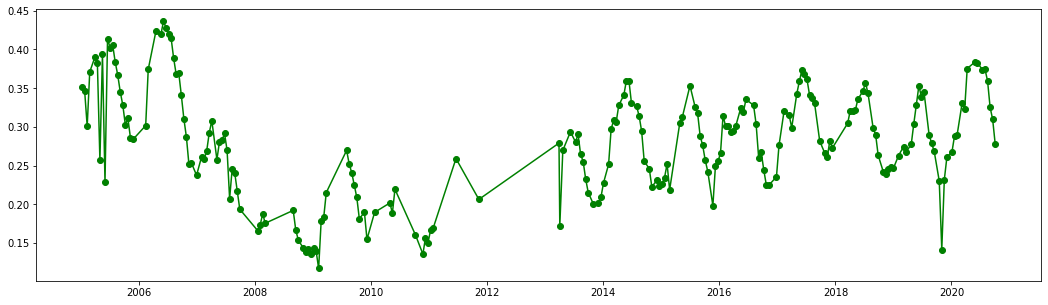

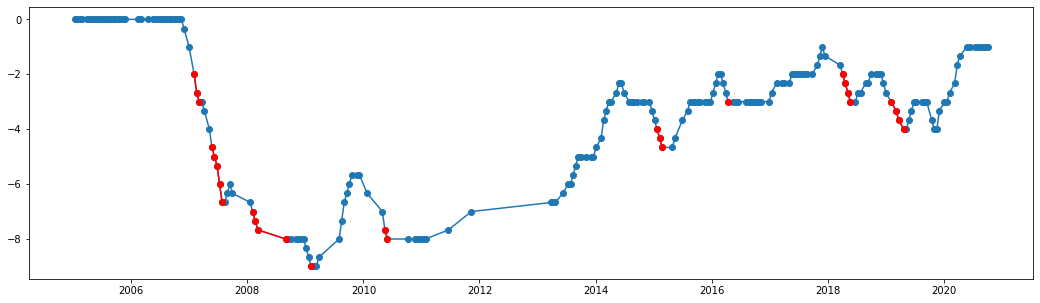

RuntimeError: No active exception to reraise

In [11]:
# TESTING !!!!!!!!!!!!!!!!
dts = np.arange(np.datetime64('2020-12-31'), np.datetime64('2022-12-31'), dtype='datetime64[M]')
dts = [dt.strftime('%Y-%m-%d') for dt in dts.astype(datetime)]
    
for dt in dts:
    try:
        print(dt)
        test(e_year=dt)
    except:
        #continue
        raise

In [1]:
from importlib import reload
reload(nrt)

ds = xr.open_dataset(r"C:\Users\Lewis\Desktop\nrt_projects\ophthalmia_project_cubes\cube_A03_change.nc")
ds = ds.load()
ds.close()

vec = np.array(ds['static'].mean(['x', 'y']))
vec_smooth = nrt.smooth_change(arr=vec) 

vec_cnd = nrt.get_candidates(vec=vec_smooth,
                             direction='decline',
                             min_consequtives=3, 
                             max_consequtives=None, 
                             inc_plateaus=False, 
                             min_stdv=2, 
                             num_zones=1, 
                             bidirectional=True,
                             ruleset='1&2',
                             binarise=True)

# temp
fig = plt.figure(figsize=[18, 5])
plt.plot(vec_smooth, marker='o')
plt.plot(np.where(vec_cnd == 1, vec_smooth, np.nan), marker='o', color='red')
plt.show()

NameError: name 'nrt' is not defined

In [ ]:
#direction inc, dec or both
#min conseqs
#inc_plateau


#min_stdv for each area
#


# combos
# remove rule 2 for very early (but noisy) incs or decs
# set rule 2 to bidirectional = true to get all incs or decs regardless of +/i zone, set to false for only one side


In [20]:
in_nc = r"C:\Users\Lewis\Desktop\nrt_projects\yandi_cubes\cube_A01_change.nc"
ds = xr.open_dataset(in_nc)
ds = ds.load()
ds

<xarray.Dataset>
Dimensions:      (time: 217, x: 5, y: 7)
Coordinates:
  * time         (time) datetime64[ns] 2005-01-10T01:42:55 ... 2020-10-02T01:...
    spatial_ref  int32 3577
  * x            (x) float64 -1.228e+06 -1.228e+06 ... -1.228e+06 -1.228e+06
  * y            (y) float64 -2.572e+06 -2.572e+06 ... -2.572e+06 -2.572e+06
Data variables:
    veg_idx      (time, y, x) float32 0.3513 0.3513 0.3513 ... 0.278 0.278 0.278
    static       (time, y, x) float32 0.0 0.0 0.0 0.0 ... -1.0 -1.0 -1.0 -1.0
    zones        (time, y, x) float32 1.0 1.0 1.0 1.0 ... -1.0 -1.0 -1.0 -1.0
    cands_inc    (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cands_dec    (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    consq_inc    (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    consq_dec    (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [28]:
arcpy.env.addOutputsToMap = True

# this is the method suggested by esri
arcpy.CopyRaster_management(in_raster=in_nc,
                            out_rasterdataset=r'C:\Users\Lewis\Desktop\crf\chg.crf',
                            format='CRF',
                            process_as_multidimensional='ALL_SLICES',
                            #build_multidimensional_transpose='TRANSPOSE'
                           )

#arcpy.env.addOutputsToMap = True

# get latest  vars except static?
arcpy.md.SubsetMultidimensionalRaster("chg.crf", 
                                      r"C:\Users\Lewis\Desktop\crf\chg_latest.crf", 
                                      "static", 
                                      "BY_VALUE", 
                                      None, 
                                      "StdTime 2020-09-16T01:57:08", 
                                      '', 
                                      '', 
                                      '', 
                                      None, 
                                      '')

# build multi dim info tool?

# now add manually to map
# stats colors seem good?


<Result 'C:\\Users\\Lewis\\Desktop\\crf\\chg_latest.crf'>

In [18]:
arcpy.env.addOutputsToMap = True
#remove_vars = ['dynamic', 'cands_inc', 'cands_dec', 'consq_inc', 'consq_dec']
remove_vars = ['cands_inc', 'cands_dec', 'consq_inc', 'consq_dec']
arcpy.md.ManageMultidimensionalRaster(target_multidimensional_raster=out_crf, 
                                      manage_mode='DELETE_VARIABLES', 
                                      variables=remove_vars, 
                                      #in_multidimensional_rasters, 
                                      #dimension_name, 
                                      #dimension_value}, 
                                      #dimension_description}, 
                                      #dimension_unit}, 
                                      update_statistics='UPDATE_STATISTICS', 
                                      update_transpose='UPDATE_TRANSPOSE')

ExecuteError: Failed to execute. Parameters are not valid.
ERROR 003127: Invalid target multidimensional raster. The target raster should be a multidimensional CRF.
Failed to execute (ManageMultidimensionalRaster).


In [37]:
ds = xr.open_dataset(r"C:\Users\Lewis\Desktop\nrt_projects\yandi_cubes\cube_A01_change.nc")
ds = ds.load()
ds = ds.mean(['x', 'y'])
dts = ds['time'].dt.strftime('%Y-%m-%d').values
chg = ds['static'].values

In [97]:
#import pandas as pd
#df = pd.DataFrame(list(zip(dts, chg)), columns=['date', 'values'])
#df.to_csv(r'C:\Users\Lewis\Desktop\crf\table.csv')

In [47]:
c = arcpy.Chart("charta")
c.title = "Land cover in Gettysburg Battlefield"
#c.rotated = True
c.type = "line"
c.xAxis.field = "FID"
c.xAxis.title = "FiDeR"
#c.bar.aggregation = "COUNT"

c.yAxis.field = "Zone"
c.yAxis.title = "ZoNeR"

p = arcpy.mp.ArcGISProject("CURRENT")
m = p.listMaps()[0]
thelayer = m.listLayers('testing')[0]
c.dataSource = thelayer

c.addToLayer(thelayer)
#c

In [62]:
import matplotlib.pyplot as plt
import os

In [98]:
in_path

'C:\\Users\\Lewis\\Desktop\\nrt_projects\\yandi'

In [100]:
# apply matplotlib to selected poly
p = arcpy.mp.ArcGISProject('CURRENT')
m = p.activeMap

try:
    layer = m.listLayers('monitoring_areas')[0]
    if layer is not None:
        
        # get folders and cubes
        in_name = os.path.basename(layer.dataSource)     # name of monitor fc
        in_gdb = os.path.dirname(layer.dataSource)                # path of gdb

        # check gdv extension
        if in_gdb.endswith('.gdb'):
            in_path = os.path.splitext(in_gdb)[0]   # path of gdb without ext
            in_data_path = in_path + '_' + 'cubes'  # associated cube data folder
            in_graph_path = in_path + '_' + 'graphs'
            in_chg_cube_path = os.path.join(in_data_path, 'cube' + '_' + row[0] + '_' + 'change' + '.nc')
        
            # get currently selected records
            sel = layer.getSelectionSet()

            if sel is not None and len(sel) == 1:
                print('one poly selected')
                with arcpy.da.SearchCursor(layer.name, field_names=['area_id']) as cursor:
                    row = cursor.next()
                    area_id = row[0]

                    if area_id is not None:
                        if os.path.exists(in_chg_cube_path):
                            ds_chg = nrt.safe_load_nc(in_chg_cube_path)
                            ds_chg = ds_chg.mean(['x', 'y'])
                            dts = ds_chg['time'].dt.strftime('%Y-%m-%d').values
                            veg_vals = ds_chg['veg_idx'].values
                            chg_vals = ds_chg['static'].values
                            zne_vals = ds_chg['zones'].values
                            
                            fig = plt.figure(figsize=[20, 8])
                            plt.plot(dts, veg_vals, color='green')
                            plt.xticks(dts[::4], rotation=90)

                            out_svg = os.path.join(in_graph_path, 'graph_veg_{}.svg'.format(area_id))
                            plt.savefig(out_svg)
                            
                            

            else:
                print('multi poly selected')
                
        else:
            print('not in a gdb')
            
except:
    print('No monitoring areas layer in table of contents.')
    


one poly selected


In [41]:
# apply symbology to monitoring areas layer

p = arcpy.mp.ArcGISProject('CURRENT')
m = p.activeMap

layers = m.listLayers()
for layer in layers:
    if layer.name == 'testing': # temp name

        # apply layer symbology to monitoring areas
        lyr = arcpy.management.ApplySymbologyFromLayer(layer.name, 
                                                       r"C:\Users\Lewis\Documents\GitHub\tenement-tools\arc\lyr\monitoring_zones_template.lyrx", 
                                                       "VALUE_FIELD Zone Zone", 
                                                       "DEFAULT")



In [3]:
template = """
    <html>
    <head>
        <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
        <script type="text/javascript">
            google.charts.load('current', { packages: ['corechart', 'line'] });
            google.charts.setOnLoadCallback(drawBasic);

            function drawBasic() {

                var data = new google.visualization.DataTable();
                data.addColumn('string', 'Dates');
                data.addColumn('number', 'Vegetation');

                //data.addRows

                var options = {
                    hAxis: {
                        title: 'Time'
                    },
                    vAxis: {
                        title: 'Vegetation'
                    },
                    //trendlines: {
                        //0: { type: 'linear', color: '#333', opacity: 0.25 }
                    //}
                };

                var chart = new google.visualization.LineChart(document.getElementById('curve_chart'));
                chart.draw(data, options);
            }
        </script>
    </head>
    <body>
        <div id="curve_chart" style="width: 100%; height: 100%"></div>
    </body>
    </html>
"""

In [68]:
# selected area id
cube_folder = r"C:\Users\Lewis\Desktop\nrt_projects\yandi_cubes"
area = "cube_A01_change.nc"
cube_path = os.path.join(cube_folder, area)

# safe open current dataset
ds = xr.open_dataset(cube_path)
ds = ds.load() 
ds.close() 

# get one value of each time (all pixels same value per date so mean is fine)
ds = ds.mean(['x', 'y'])

# get value vectors for time, veg, change, etc...
dts = ds['time'].dt.strftime('%Y-%m-%d').values  # datetimes as string
veg = ds['veg_idx'].values                       # mean veg index
chg = ds['static'].values                        # static change deviations
zne = ds['static'].values                        # generalised zone values

# check if all vectors same size
if len(dts) == len(veg) == len(chg) == len(zne):
    print('Vectors all same size')
    
    # construct data rows
    data_rows = []
    for i in range(len(dts)):
        # check if nans
        # 
        
        # add to data payload
        data_rows.append([dts[i], veg[i]])
        
    # when we done, update html
    html_block = "data.addRows(" + str(data_rows) + ");"
    out_html = template.replace('//data.addRows', html_block)
    
else:
    out_html = "<b>Could not draw graph.</b>"
    


Vectors all same size
